In [34]:
import os, sys
import matplotlib
import matplotlib.pyplot as plt
print(os.getpid())

18568


In [36]:
sys.path.append(r'..')
from ChromAn import src
from ChromAn.src.file_io.dax_process import DaxProcesser
from ChromAn.src.visual_tools.interactive import imshow_mark_3d

In [31]:
image_folder = r'\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\PE_LT\20230702-4T1_tso\H0M1'
#image_folder = r'\\10.245.74.212\Chromatin_NAS_2\Pu\20230630-4T1cell_methanol\H0M1'
image_basenames = sorted([_fl for _fl in os.listdir(image_folder) if _fl.split(os.extsep)[-1] =='dax'])
print(image_folder)
print(image_basenames)

\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\PE_LT\20230702-4T1_tso\H0M1
['Conv_zscan_00.dax', 'Conv_zscan_01.dax', 'Conv_zscan_02.dax', 'Conv_zscan_05.dax', 'Conv_zscan_06.dax', 'Conv_zscan_07.dax', 'Conv_zscan_08.dax', 'Conv_zscan_09.dax', 'Conv_zscan_10.dax', 'Conv_zscan_11.dax', 'Conv_zscan_12.dax', 'Conv_zscan_13.dax', 'Conv_zscan_15.dax', 'Conv_zscan_17.dax', 'Conv_zscan_18.dax', 'Conv_zscan_19.dax', 'Conv_zscan_20.dax', 'Conv_zscan_22.dax', 'Conv_zscan_23.dax', 'Conv_zscan_24.dax', 'Conv_zscan_25.dax', 'Conv_zscan_26.dax', 'Conv_zscan_28.dax', 'Conv_zscan_30.dax', 'Conv_zscan_31.dax', 'Conv_zscan_32.dax', 'Conv_zscan_33.dax', 'Conv_zscan_34.dax', 'Conv_zscan_35.dax', 'Conv_zscan_36.dax', 'Conv_zscan_37.dax', 'Conv_zscan_38.dax', 'Conv_zscan_39.dax', 'Conv_zscan_40.dax', 'Conv_zscan_41.dax', 'Conv_zscan_42.dax', 'Conv_zscan_43.dax', 'Conv_zscan_46.dax', 'Conv_zscan_47.dax', 'Conv_zscan_48.dax', 'Conv_zscan_49.dax', 'Conv_zscan_50.dax', 'Conv_zscan_51.dax', 'Conv_zscan_53.dax'

In [32]:
image_filename = os.path.join(image_folder, image_basenames[0])
print(image_filename)
# load image
daxp = DaxProcesser(image_filename,
                    CorrectionFolder=r'\\KOLMOGOROV\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor_from_60_to_50' )
daxp._load_image()
# corrections
#daxp._corr_illumination()
#daxp._corr_bleedthrough()
#daxp._corr_hot_pixels()

\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\PE_LT\20230702-4T1_tso\H0M1\Conv_zscan_00.dax
Initialize DaxProcesser for file:\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\PE_LT\20230702-4T1_tso\H0M1\Conv_zscan_00.dax
- New save file: \\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\PE_LT\20230702-4T1_tso\H0M1\Conv_zscan_00_processed.hdf5
-- all used channels: ['750', '647', '561', '488', '405']
-- single image size: [  50 2048 2048]
- Loaded images for channels:['750', '647', '561', '488', '405'] in 7.531s.


In [42]:
%matplotlib notebook
f = plt.figure(dpi=125)
imshow_mark_3d([getattr(daxp, f"im_{_ch}") for _ch in daxp.channels], 
                fig=f,
                image_names=daxp.channels, 
                min_max_default=[2000,20000],
                )

<IPython.core.display.Javascript object>

In [344]:
ref_image_folder = r'\\10.245.74.212\Chromatin_NAS_2\Pu\20230702-4T1_tso\H0M1'
ref_image_basenames = image_basenames #= sorted([_fl for _fl in os.listdir(image_folder) if _fl.split(os.extsep)[-1] =='dax'])
print(image_folder)
#print(image_basenames)
ref_image_filename = os.path.join(ref_image_folder, os.path.basename(image_filename))
print(ref_image_filename)
# load image
ref_daxp = DaxProcesser(ref_image_filename,
                    CorrectionFolder=r'\\KOLMOGOROV\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor_from_60_to_50' )
ref_daxp._load_image()
# corrections
#daxp._corr_illumination()
#daxp._corr_hot_pixels()

\\10.245.74.212\Chromatin_NAS_2\Pu\20230702-4T1_tso\H7M8
\\10.245.74.212\Chromatin_NAS_2\Pu\20230702-4T1_tso\H0M1\Conv_zscan_88.dax
Initialize DaxProcesser for file:\\10.245.74.212\Chromatin_NAS_2\Pu\20230702-4T1_tso\H0M1\Conv_zscan_88.dax
- New save file: \\10.245.74.212\Chromatin_NAS_2\Pu\20230702-4T1_tso\H0M1\Conv_zscan_88_processed.hdf5
-- all used channels: ['750', '647', '561', '488', '405']
-- single image size: [  50 2048 2048]
- Loaded images for channels:['750', '647', '561', '488', '405'] in 7.432s.


<IPython.core.display.Javascript object>


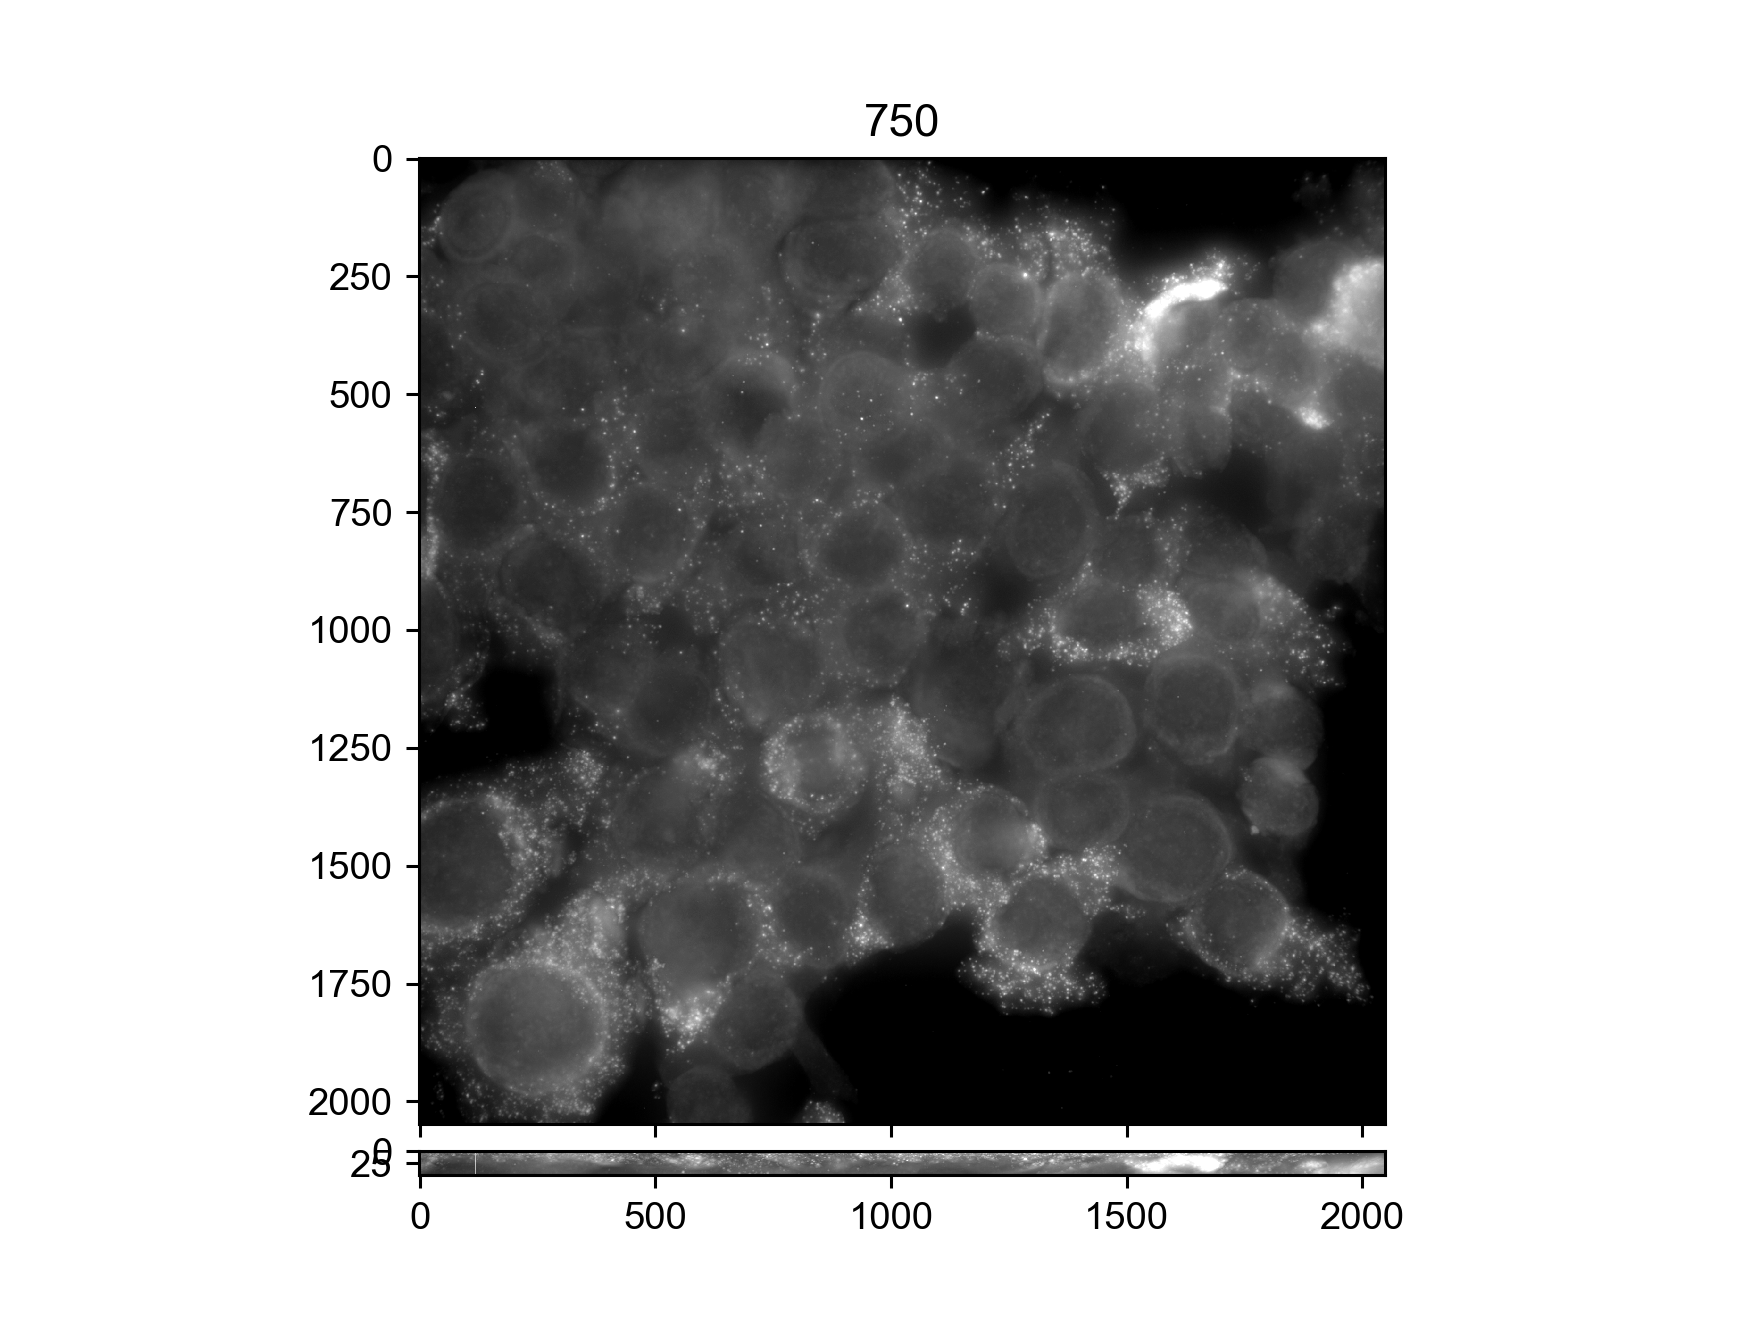

In [345]:
%matplotlib notebook
f = plt.figure(dpi=125)
ia.visual_tools.imshow_mark_3d_v2([getattr(ref_daxp, f"im_{_ch}") for _ch in ref_daxp.channels], 
                                  fig=f,
                                  image_names=ref_daxp.channels, 
                                  min_max_default=[2000,20000],
                                 )

<IPython.core.display.Javascript object>


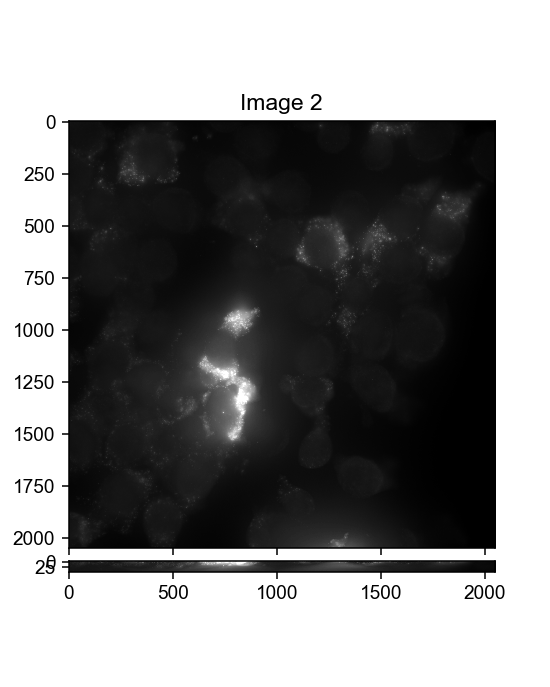

In [319]:
ia.visual_tools.imshow_mark_3d_v2([ref_daxp.im_488, daxp.im_488])

<IPython.core.display.Javascript object>


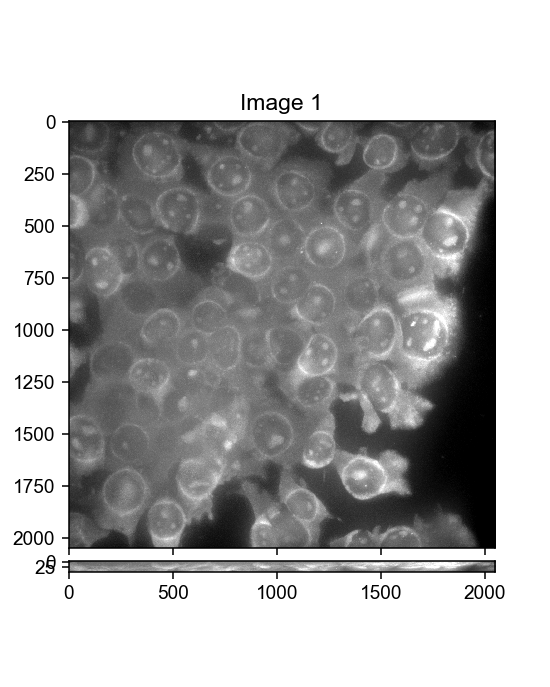

In [322]:
ia.visual_tools.imshow_mark_3d_v2([ref_daxp.im_488, daxp.im_488])

<IPython.core.display.Javascript object>


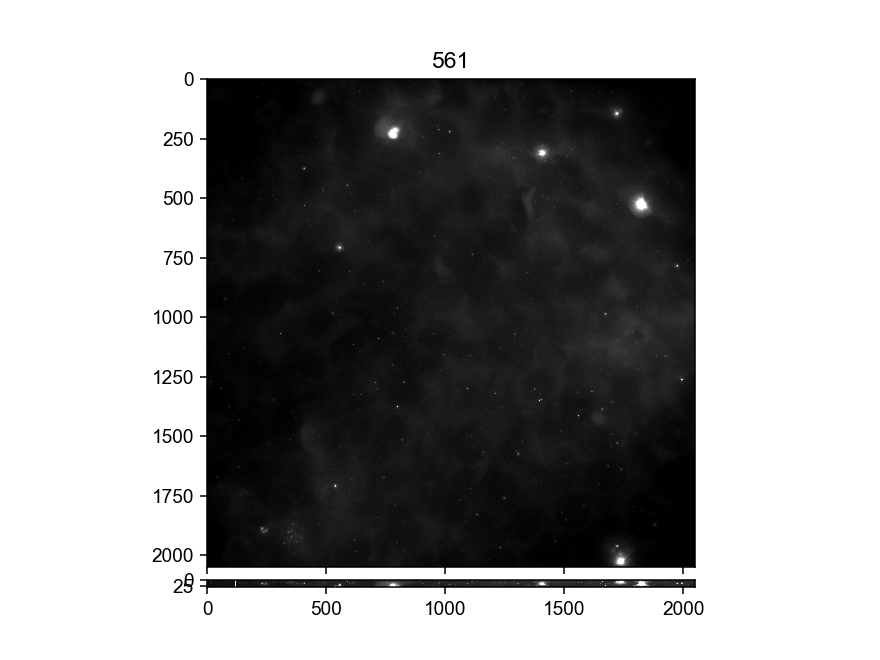

In [267]:
%matplotlib notebook
f = plt.figure(dpi=125)
ia.visual_tools.imshow_mark_3d_v2([getattr(ref_daxp, f"im_{_ch}") for _ch in ref_daxp.channels], 
                                  fig=f,
                                  image_names=ref_daxp.channels, 
                                  min_max_default=[2000,20000],
                                 )

<IPython.core.display.Javascript object>


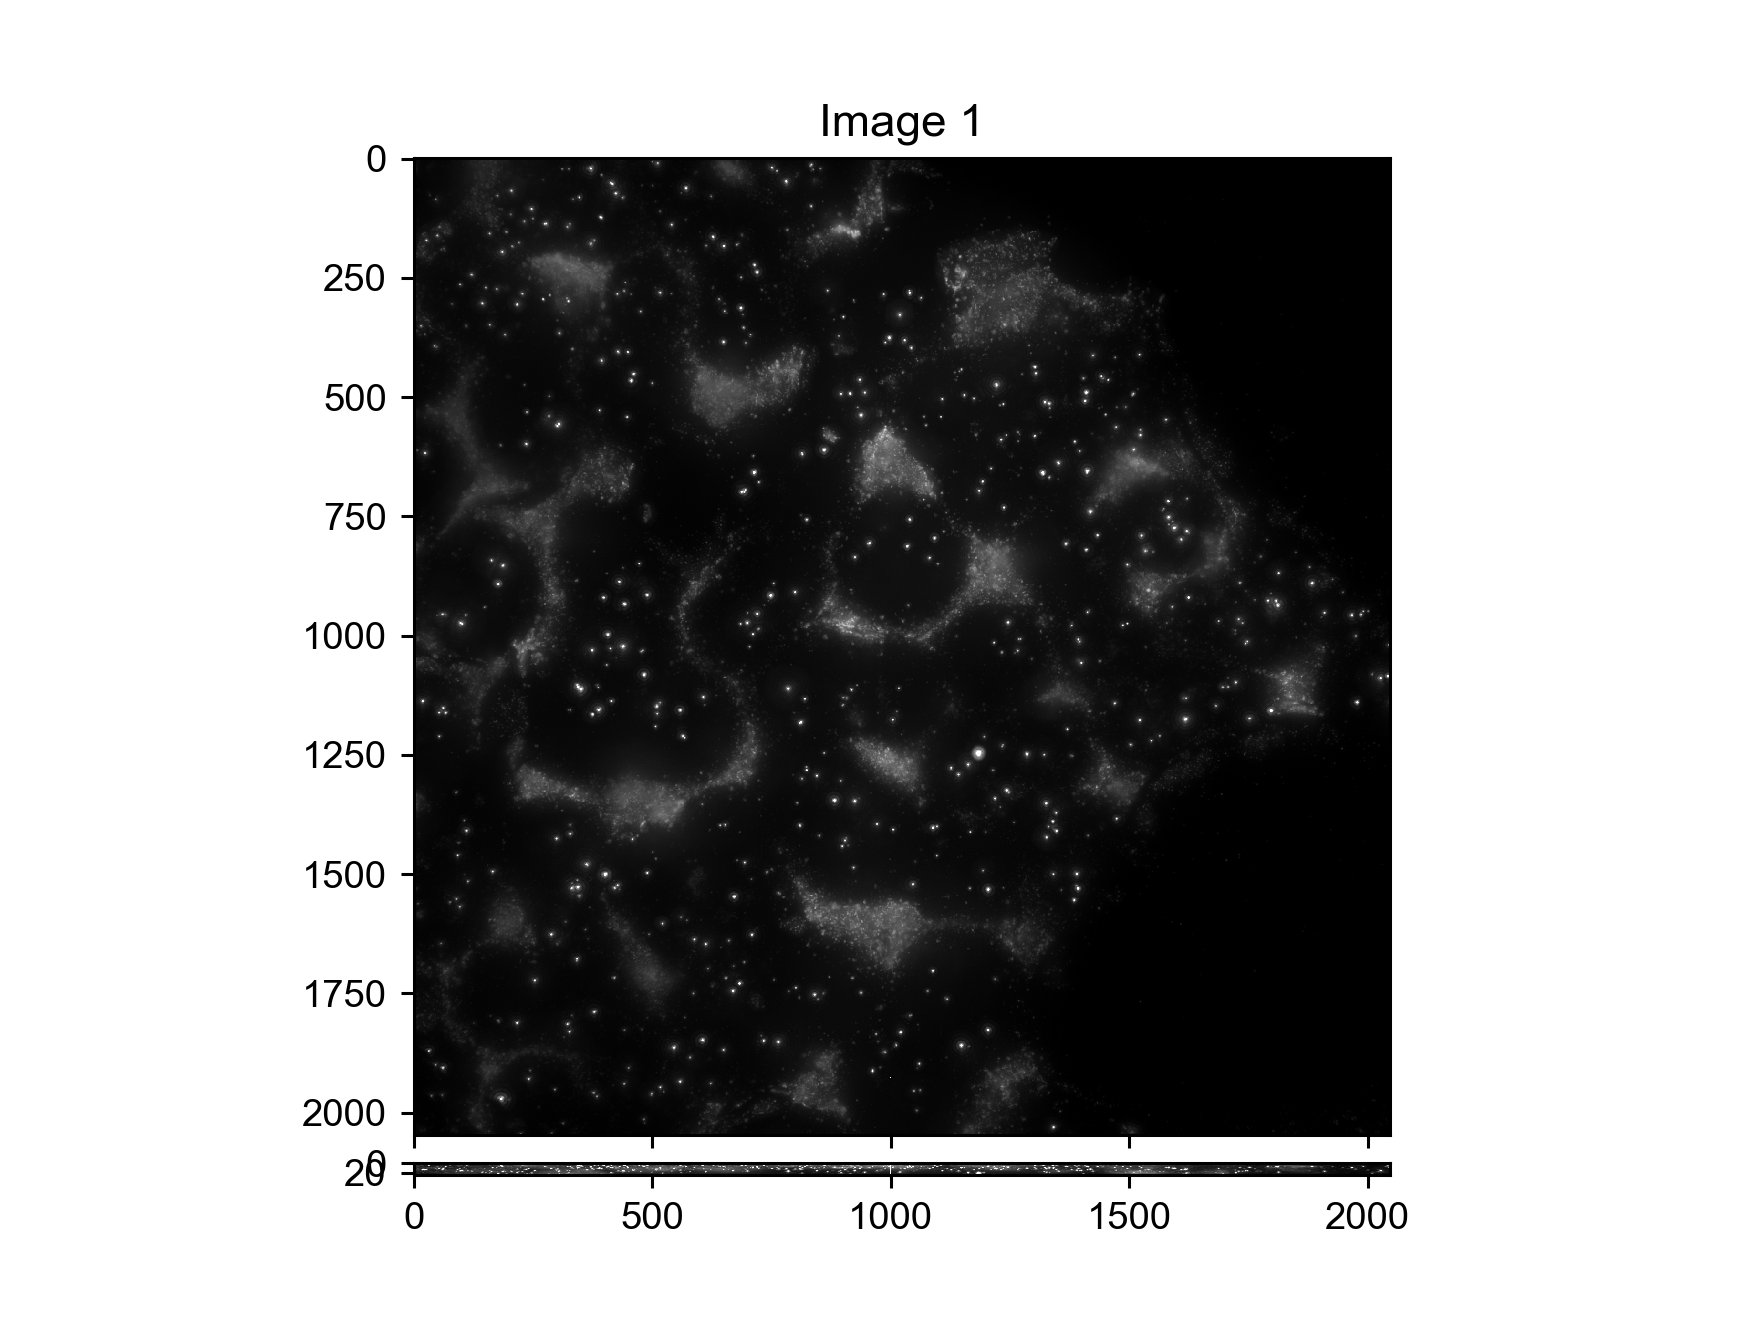

In [231]:
%matplotlib notebook
f = plt.figure(dpi=125)
ia.visual_tools.imshow_mark_3d_v2([daxp.im_488,daxp.im_561, daxp.im_405], 
                                  fig=f,
                                  #image_names=daxp.channels, 
                                  min_max_default=[2000,20000],
                                 )

# Ref image

In [198]:
ref_image_filename = r'\\10.245.74.212\Chromatin_NAS_2\Pu\20230510-4T1_edits_11k_ns\H0M1\Conv_zscan_125.dax'
print(ref_image_filename)

ref_im = ia.visual_tools.batch_load_dax(ref_image_filename)

#split by channel
image_channels = [750,488,561,488,405]
splitted_ref_ims = ia.io_tools.load.split_im_by_channels(ref_im, 
                                                      image_channels,
                                                      image_channels,
                                                      num_buffer_frames=0, 
                                                      single_im_size=[50,2048,2048])

\\10.245.74.212\Chromatin_NAS_2\Pu\20230510-4T1_edits_11k_ns\H0M1\Conv_zscan_125.dax


<IPython.core.display.Javascript object>


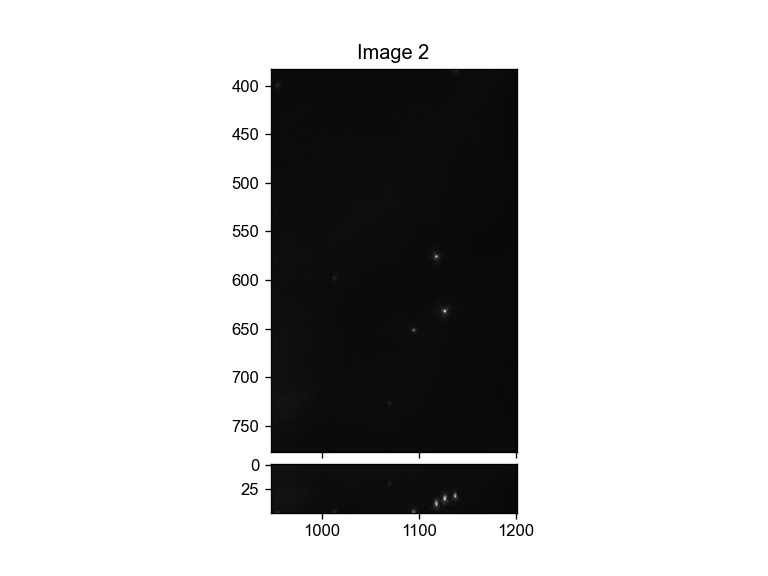

In [212]:
%matplotlib notebook
f = plt.figure(dpi=120)
ia.visual_tools.imshow_mark_3d_v2([splitted_ims1[-1],splitted_ref_ims[-2]], fig=f,
                                  #image_names=image_channels, 
                                  min_max_default=[100,5000],
                                 )

<IPython.core.display.Javascript object>


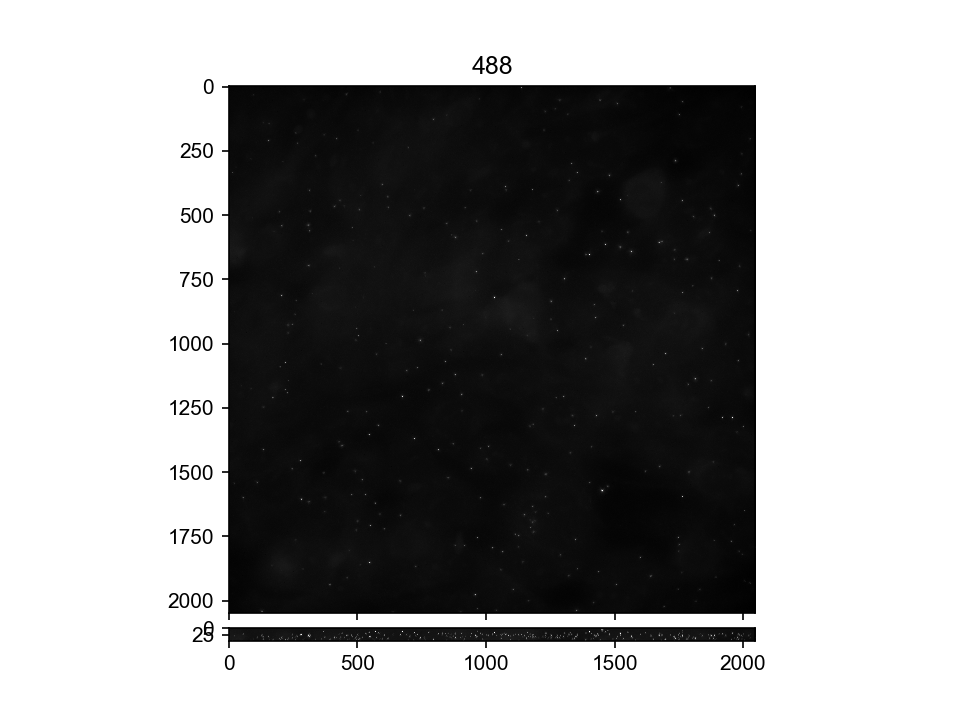

In [145]:
%matplotlib notebook
f = plt.figure(dpi=150)
ia.visual_tools.imshow_mark_3d_v2(splitted_ref_ims, fig=f,
                                  image_names=image_channels, min_max_default=[1000,30000])

In [211]:
%matplotlib notebook
ia.visual_tools.imshow_mark_3d_v2([splitted_ims1[-2], splitted_ims2[-2]], )

NameError: name 'splitted_ims2' is not defined